In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import h5py
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, FuncFormatter)
from matplotlib.lines import Line2D
import matplotlib.font_manager
import numpy as np

import atlas_mpl_style as ampl
ampl.use_atlas_style(usetex=True)
ampl.set_color_cycle("Paper", 6)

/home/abadea/.local/lib/python3.8/site-packages/atlas_mpl_style/__init__.py:212: UserWarning: No LaTeX installation found -- atlas-mpl-style is falling back to usetex=False
  _warn.warn(


In [23]:
with h5py.File("outdir/etaMassScan10k/results.h5", "r") as f:
    m_eta = np.array(f["m_eta"])
    mean = np.array(f["mean"])
    std = np.array(f["std"])

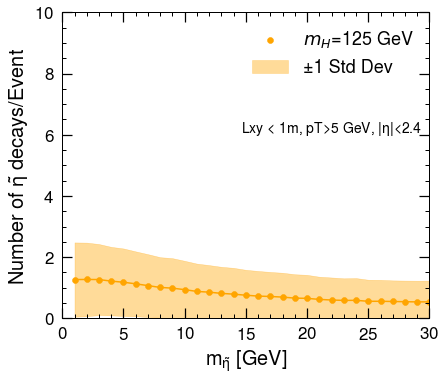

In [46]:
# make plot
fig = plt.figure(figsize=(6, 5))
ax = plt.axes([0.1, 0.1, 0.85, 0.85])

# Plotting the mean line
plt.plot(m_eta, mean, color='orange')
# Plotting the data
plt.scatter(m_eta, mean, label=r'$\mathit{m_{H}}$=125 GeV', alpha=1.0, color="orange")

# Plotting the upper and lower bands (mean ± 1 std deviation)
plt.fill_between(m_eta, mean - std, mean + std, color='orange', alpha=0.4, label='±1 Std Dev')



# tick params
tick_params_major = {"which"     : "major",
                     "length"    : 10,
                     "width"     : 1.25,
                     "direction" : "in",
                     "right"     : True,
                     "top"       : True,
                     "labelsize" : 17,
                     "pad"       : 8}
tick_params_minor = {"which"     : "minor",
                     "length"    : 4,
                     "width"     : 1,
                     "direction" : "in",
                     "right"     : True,
                     "top"       : True,
                     "labelsize" : 15}

# ax.xaxis.set_minor_locator(AutoMinorLocator(5))
# ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.tick_params(**tick_params_major)
ax.tick_params(**tick_params_minor)
plt.locator_params(axis='y', nbins=8)
plt.locator_params(axis='x', nbins=8)

# set limits
plt.xlim(0,30)
plt.ylim(0,10)

# Customizing the plot
plt.xlabel(r'$m_{\tilde{\eta}}$ [GeV]')
plt.ylabel(r'Number of $\tilde{\eta}$ decays/Event')
plt.legend()

# add text
plt.text(0.98, 0.65, r"Lxy < 1m, pT>5 GeV, |$\eta$|<2.4", fontsize=14, ha='right', va='top', transform=plt.gca().transAxes)

# plt.grid(True)
plt.show()
